# **Mileage Prediction - Regression Analysis**

# ***Objective***
To develop a model that can accurately predict the mileage or fuel efficiency of a vehicle based on certain input features.

# **Data Source**
This dataset was taken from the Statlib library which is maintained at Carnegie Mellon University.


# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# **Import Data**

In [ ]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# **Data Preprocessing**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# **Removing Missing Values**

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# **Data Visualization**

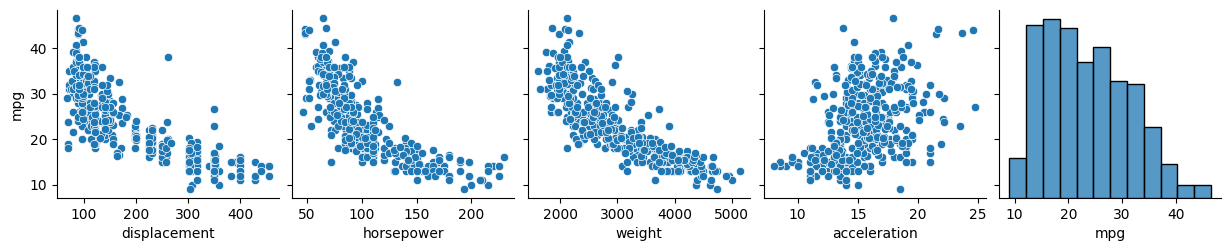

In [ ]:
sns.pairplot(df, x_vars=['displacement','horsepower','weight','acceleration','mpg'], y_vars=['mpg']);

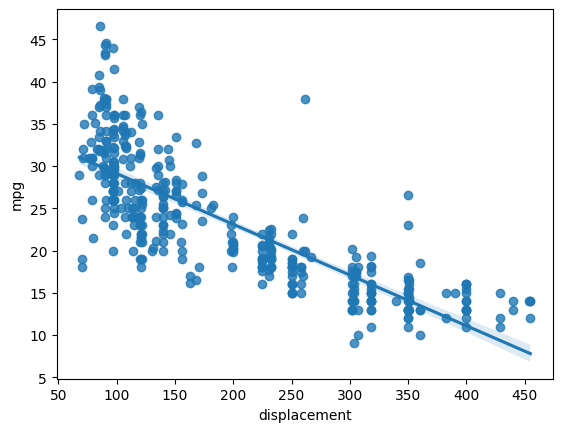

In [ ]:
sns.regplot(x='displacement', y='mpg', data=df);

# **Define Target Variable y and Feature X**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
X=df[['displacement','horsepower','weight','acceleration']]

In [ ]:
X.shape

(392, 4)

In [ ]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# **Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x=ss.fit_transform(X)

In [ ]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [ ]:
pd.DataFrame(X).describe()

,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327
std,104.644004,38.491160,849.402560,2.758864
min,68.000000,46.000000,1613.000000,8.000000
25%,105.000000,75.000000,2225.250000,13.775000
50%,151.000000,93.500000,2803.500000,15.500000
75%,275.750000,126.000000,3614.750000,17.025000
max,455.000000,230.000000,5140.000000,24.800000


# **Train_test split data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
lr.intercept_

23.36123134577348

In [ ]:
lr.coef_

array([-1.06153314, -2.0051715 , -3.94146547, -0.1275873 ])

In [ ]:
y_pred = lr.predict(xtest)

In [ ]:
y_pred

array([25.00420081, 26.45914823, 25.04619081, 23.83697773, 20.15245123,
       20.05488083, 29.96841865, 29.32820867, 30.5048777 , 17.21727298,
       31.10214746, 15.67433222, 20.88094465, 27.52178366, 14.2775465 ,
       25.97629726,  7.71103747, 12.75187348, 30.43273057, 24.92661125,
       25.09846131, 24.22773345, 20.43049813, 11.76642078, 10.9131605 ,
       25.74386065, 24.22515251, 25.97010396, 32.11010599,  8.96298365,
       24.11383791,  7.11341792, 23.5247276 , 23.32304061, 29.66995169,
        8.60614492, 25.15434117, 30.60610352, 26.94907445, 25.07658393,
       24.75106256, 30.13645143, 28.94051923, 30.346382  , 22.15028099,
       27.64587871, 31.65638963, 29.19599536, 27.20685897, 28.23617798,
       31.92056212, 31.71357884, 20.17103376,  5.46878509, 24.60363773,
       16.07187015, 19.63289624, 30.70174778,  9.58685745, 30.60038435,
       16.84191778, 17.75971084, 10.2414497 , 30.90000357, 14.95049447,
       25.2919406 , 22.69925741, 29.62912291, 23.44888145, 31.06

# **Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
mean_absolute_error(ytest, y_pred)

3.110344334190513

In [ ]:
mean_absolute_percentage_error(ytest, y_pred)

0.14089710603539243

In [ ]:
r2_score(ytest, y_pred)

0.6896145796465872

# **Explanation**
 The above code loads a dataset, preprocesses it by removing missing values, performs data visualization using scatter plots and regression plots, scales the features, splits the data into training and testing sets, trains a Linear Regression model, predicts the target variable on the test set, and evaluates the model's performance using mean absolute error, mean absolute percentage error, and R-squared score.